In [17]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [18]:
#importing the dataset
content = open('dataset_textfilter.json' , encoding='utf-8')
data1 = json.load(content)

In [19]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [20]:
#converting to dataframe
data = pd.DataFrame({"input":inputs,"tag":tags})

In [21]:
#printing the data
data

,input,tag
0,Area is 1000 square feet. I want 1 bedroom. 1 ...,"1000,1,1,1,1"
1,It is 1500 square feet. I want to. Two bedroom...,"1500,2,1,1,1"
2,Area is 1300 square feet. I want to. three bed...,"1300,3,1,1,1"
3,Area is 900 square feet. two Bedroom. Two wash...,"900,2,2,1,1"
4,Area is 1000 square feet. I want three bedroom...,"1000,3,3,1,1"
5,It is 1100 square feet. I want to. Two bedroom...,"1100,2,1,1,1"
6,Area is 1800 square feet. I want three bedroom...,"1800,3,1,1,1"
7,Area is 2000 square feet. I want four bedroom ...,"2000,4,2,1,1"
8,Area is 800 square feet. two Bedroom. one wash...,"800,2,1,1,1"
9,Area is 1400 square feet. I want three bedroom...,"1400,3,2,1,1"


In [22]:
#removing punctuations
import string
data['input'] = data['input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['input'] = data['input'].apply(lambda wrd: ''.join(wrd))
data

,input,tag
0,area is 1000 square feet i want 1 bedroom 1 ve...,"1000,1,1,1,1"
1,it is 1500 square feet i want to two bedroom o...,"1500,2,1,1,1"
2,area is 1300 square feet i want to three bedro...,"1300,3,1,1,1"
3,area is 900 square feet two bedroom two wash r...,"900,2,2,1,1"
4,area is 1000 square feet i want three bedroom ...,"1000,3,3,1,1"
5,it is 1100 square feet i want to two bedroom o...,"1100,2,1,1,1"
6,area is 1800 square feet i want three bedroom ...,"1800,3,1,1,1"
7,area is 2000 square feet i want four bedroom t...,"2000,4,2,1,1"
8,area is 800 square feet two bedroom one wash r...,"800,2,1,1,1"
9,area is 1400 square feet i want three bedroom ...,"1400,3,2,1,1"


In [23]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['input'])
train = tokenizer.texts_to_sequences(data['input'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [24]:
input_shape = x_train.shape[1]
print(input_shape)

19


In [25]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  67
output length:  32


In [26]:
def get_model():
    #creating the model
    i = Input(shape=(input_shape,))
    x = Embedding(vocabulary+1,10)(i)
    x = LSTM(10,return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(output_length,activation="softmax")(x)
    model = Model(i,x)
    return model

In [27]:
model = get_model()

In [28]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [29]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 7ms/step - loss: 3.4658 - accuracy: 0.0500
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 3.4628 - accuracy: 0.1000
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 3.4602 - accuracy: 0.1250
Epoch 4/200
2/2 [==============================] - 0s 12ms/step - loss: 3.4579 - accuracy: 0.1000
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 3.4554 - accuracy: 0.1000
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 3.4531 - accuracy: 0.1000
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 3.4504 - accuracy: 0.1000
Epoch 8/200
2/2 [==============================] - 0s 12ms/step - loss: 3.4478 - accuracy: 0.1000
Epoch 9/200
2/2 [==============================] - 0s 12ms/step - loss: 3.4446 - accuracy: 0.1000
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 3.4412 - accuracy: 0.1000
Epoch 11/200
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 2.6631 - accuracy: 0.1250
Epoch 85/200
2/2 [==============================] - 0s 7ms/step - loss: 2.6549 - accuracy: 0.1250
Epoch 86/200
2/2 [==============================] - 0s 9ms/step - loss: 2.6470 - accuracy: 0.1250
Epoch 87/200
2/2 [==============================] - 0s 8ms/step - loss: 2.6370 - accuracy: 0.1500
Epoch 88/200
2/2 [==============================] - 0s 9ms/step - loss: 2.6291 - accuracy: 0.1500
Epoch 89/200
2/2 [==============================] - 0s 9ms/step - loss: 2.6205 - accuracy: 0.1500
Epoch 90/200
2/2 [==============================] - 0s 8ms/step - loss: 2.6121 - accuracy: 0.1750
Epoch 91/200
2/2 [==============================] - 0s 9ms/step - loss: 2.6064 - accuracy: 0.1750
Epoch 92/200
2/2 [==============================] - 0s 8ms/step - loss: 2.5975 - accuracy: 0.1750
Epoch 93/200
2/2 [==============================] - 0s 7ms/step - loss: 2.5883 - accuracy: 0.1750
Epoch 94/200
2/2 [===============

Epoch 167/200
2/2 [==============================] - 0s 8ms/step - loss: 1.9285 - accuracy: 0.4250
Epoch 168/200
2/2 [==============================] - 0s 7ms/step - loss: 1.9172 - accuracy: 0.4000
Epoch 169/200
2/2 [==============================] - 0s 7ms/step - loss: 1.9104 - accuracy: 0.4250
Epoch 170/200
2/2 [==============================] - 0s 7ms/step - loss: 1.9029 - accuracy: 0.4500
Epoch 171/200
2/2 [==============================] - 0s 6ms/step - loss: 1.8968 - accuracy: 0.4500
Epoch 172/200
2/2 [==============================] - 0s 7ms/step - loss: 1.8851 - accuracy: 0.4500
Epoch 173/200
2/2 [==============================] - 0s 7ms/step - loss: 1.8776 - accuracy: 0.4500
Epoch 174/200
2/2 [==============================] - 0s 7ms/step - loss: 1.8696 - accuracy: 0.4500
Epoch 175/200
2/2 [==============================] - 0s 9ms/step - loss: 1.8626 - accuracy: 0.4750
Epoch 176/200
2/2 [==============================] - 0s 8ms/step - loss: 1.8539 - accuracy: 0.4750
Epoch 177/

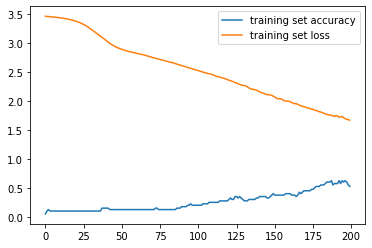

In [30]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [31]:
#Saving model
import os.path
if os.path.isfile("textclassify-001") is False:
    model.save("textclassify001.h5")

In [ ]:
# Testing Model
# chatting
import random
from tensorflow import keras


#Loading model
reconstructed_model = keras.models.load_model("textclassify001.h5")


while True:
    texts_p = []
    prediction_input = input('You : ')
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    
    #getting output from model
    output = reconstructed_model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Output :",responses[response_tag])

You : Area is 1000 square feet. I want 1 bedroom. 1
1/1 [==============================] - 0s 463ms/step
Output : ['800,2,1,1,1']
You : It is 1500 square feet. I want to. Two bedroom
1/1 [==============================] - 0s 16ms/step
Output : ['Area:1600,Bedroom:3,Bathroom:1,LivingRoom:1,Kitchen:1']
